# Random Forest

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.Random decision forests correct for decision trees' habit of overfitting to their training set.

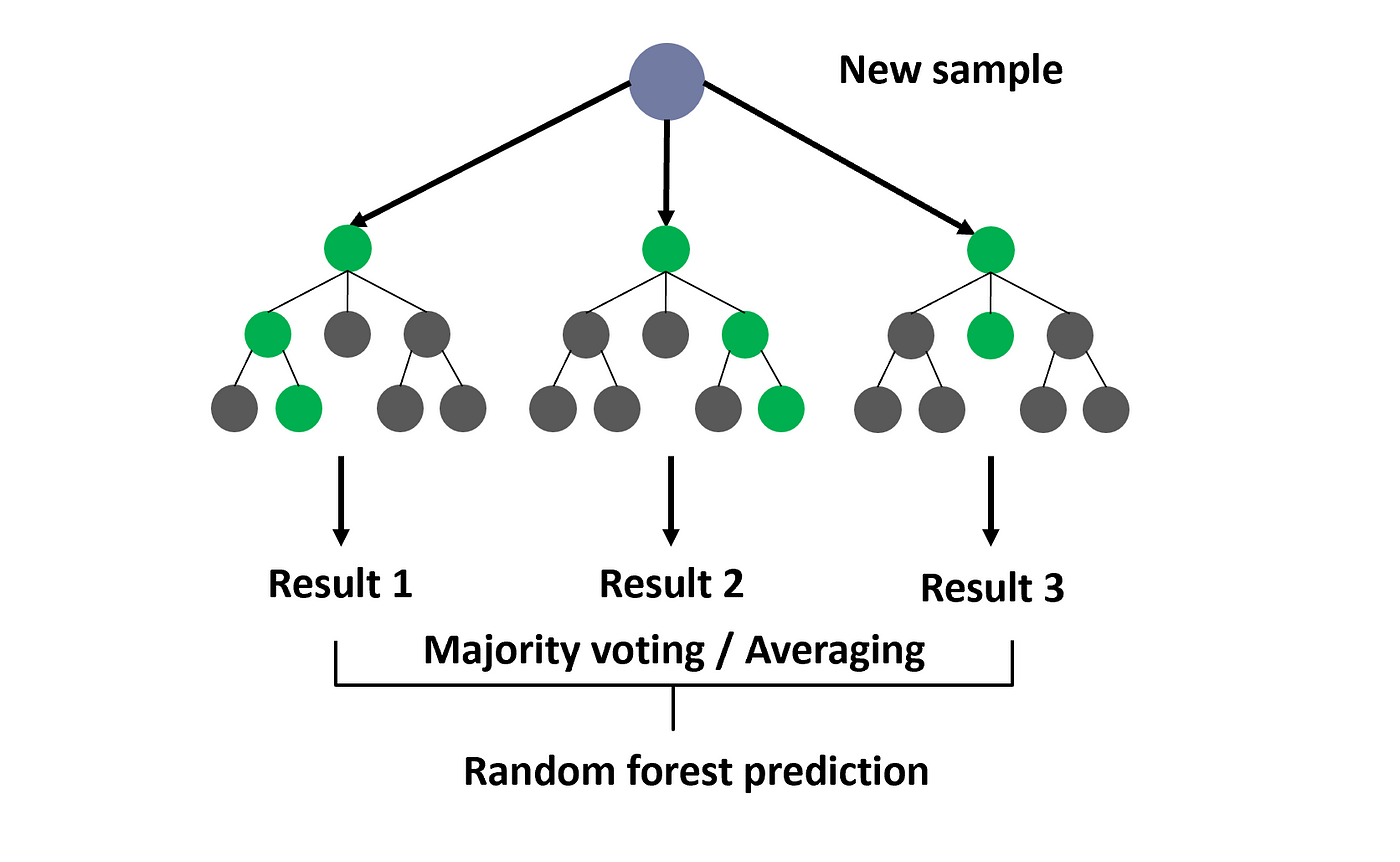

## Ensemble Learning models
Ensemble learning models work just like a group of diverse experts teaming up to make decisions – think of them as a bunch of friends with different strengths tackling a problem together. Picture it as a group of friends with different skills working on a project. Each friend excels in a particular area, and by combining their strengths, they create a more robust solution than any individual could achieve alone.

### Bagging
Bagging is an ensemble learning model, where multiple week models are trained on different subsets of the training data. Each subset is sampled with replacement and prediction is made by averaging the prediction of the week models for regression problem and considering majority vote for classification problem.

# 1. Bagging vs Random Forest
The main difference between bagging and random forest lies in the way they introduce randomness in the dataset. Bagging introduces randomness by sampling with replacement, while random forest introduces randomness by using a subset of features for each tree.

Bagging is a simple and effective technique that can improve the accuracy of a model by reducing the variance. However, bagging does not address the problem of highly correlated trees, which can reduce the diversity of the model.

Random forest, on the other hand, addresses the problem of correlated trees by using a subset of features at each node. This results in a diverse set of trees that can improve the accuracy of a model by reducing overfitting and increasing the diversity of the model.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [10]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.402247,-3.037732,0.653820,-2.220565,-4.376781,0
1,0.286437,1.184060,-1.814223,-0.962185,-0.055812,1
2,-0.291333,0.158925,-0.544808,-1.589356,-0.461602,0
3,-0.298798,1.797003,-0.980568,0.602945,-3.509844,1
4,-1.620551,1.082215,-2.224603,-0.088653,1.486210,0


In [14]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

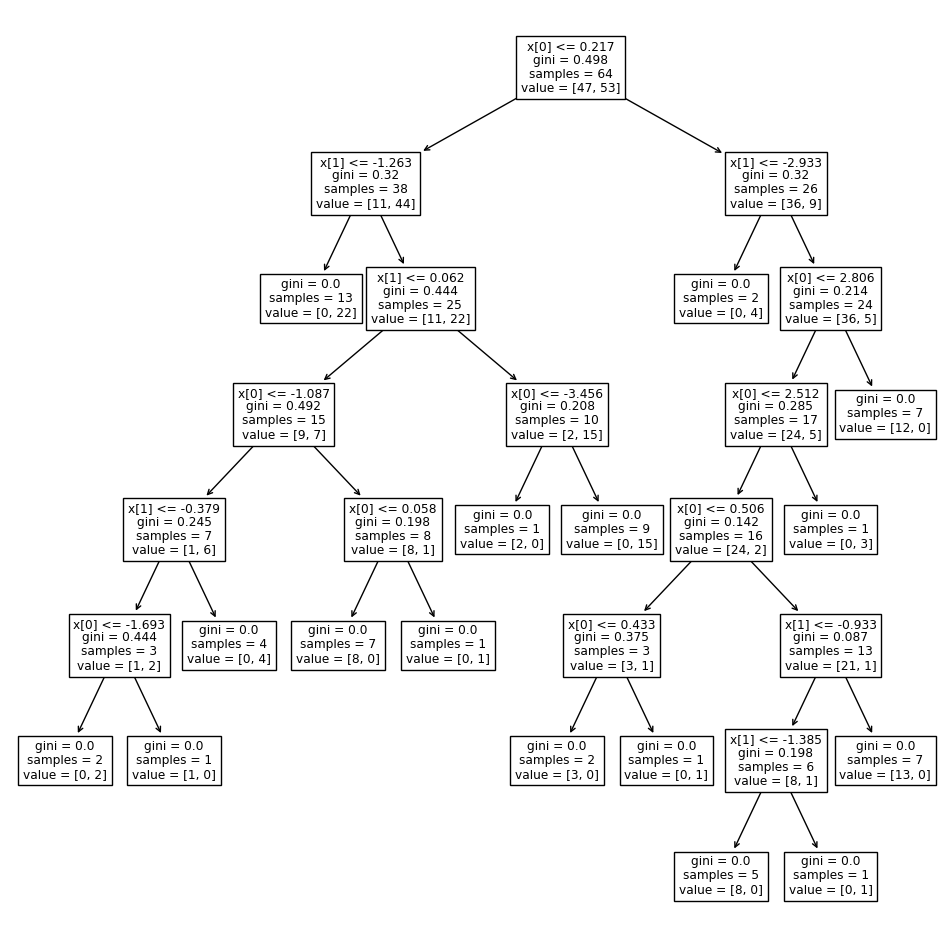

In [15]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [22]:
rf = RandomForestClassifier(max_features=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

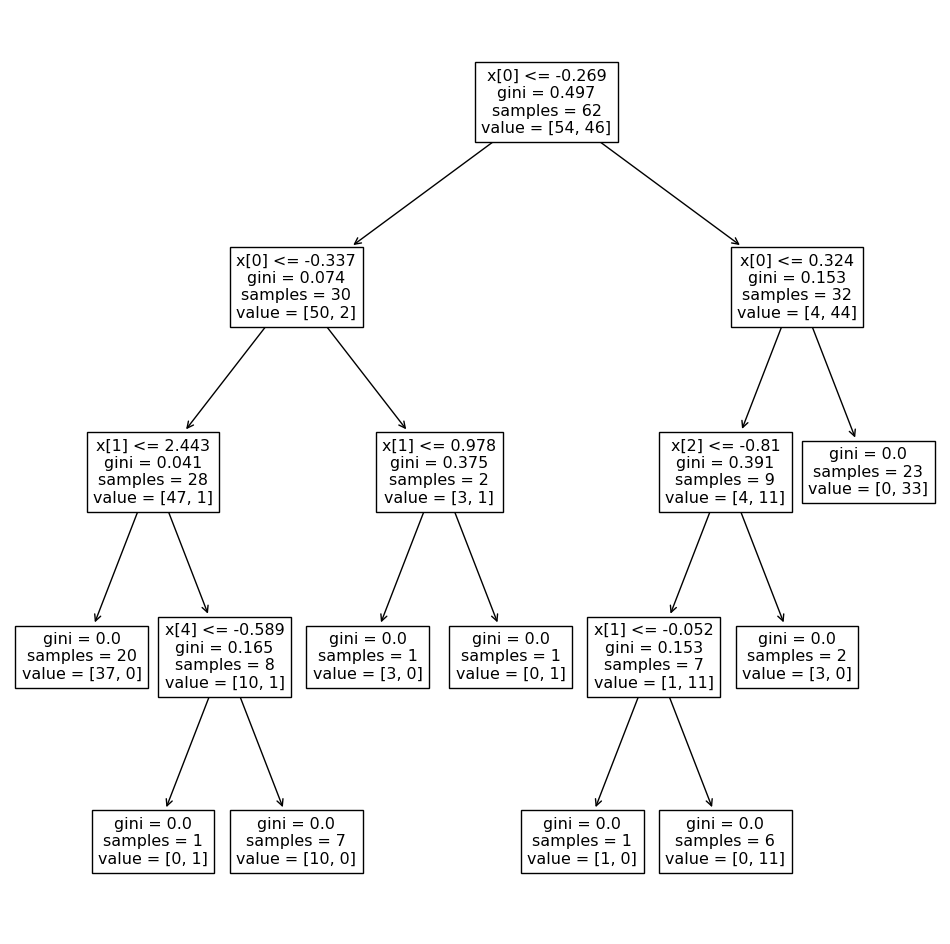

In [23]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

# 2. OOB score in Random forest

Out of Bag score or Out of bag error is the technique, or we can say it is a validation technique mainly used in the bagging algorithms to measure the error or the performance of the models in every epoch for reducing the total error of the models in the end.

In [24]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

0.925

In [26]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

# 3. Feature importance in Random forest

Feature importance is a key concept in machine learning that refers to the relative importance of each feature in the training data. In other words, it tells us which features are most important in terms of predicting the values of the target variable with most accuracy. Determining feature importance is one of the key steps of machine learning model development pipeline. Feature importance can be calculating score that measures how often a feature is used in the model and how much it contributes to the overall predictions.

In [27]:
rf = RandomForestClassifier()
rf.fit(X,y)
rf.feature_importances_

array([0.55099167, 0.11010578, 0.06570519, 0.0847656 , 0.18843176])